# Red Wine Quality Exploration

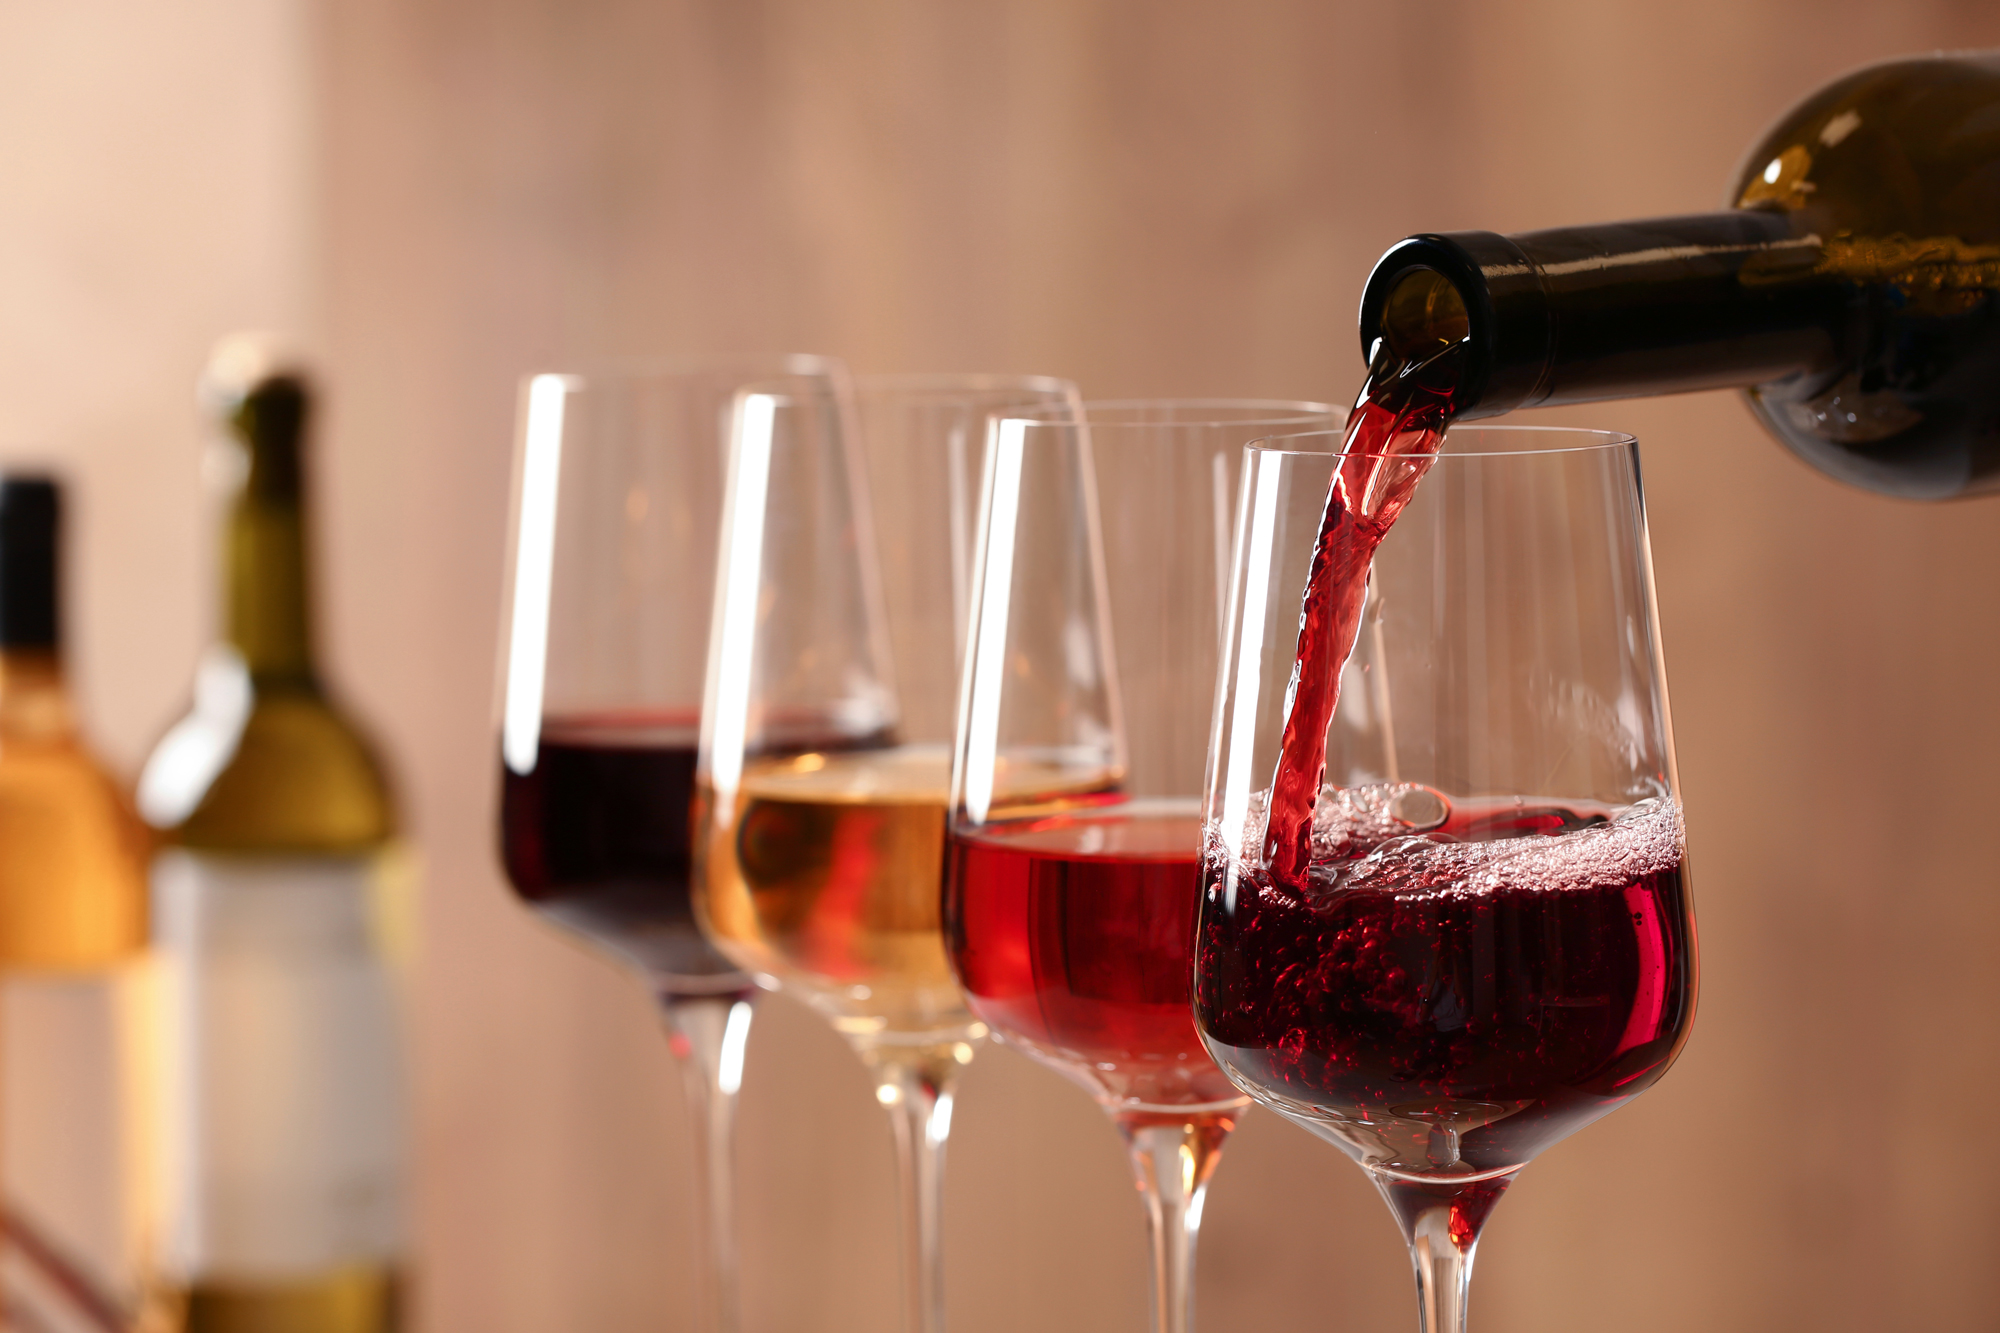

In [1]:
from IPython.display import Image
Image(filename="wine.jpg", width=500)

## imports libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## loads data

In [3]:
data = pd.read_csv("data.csv")

## exploratory analysis

### shows dataframe with all columns

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### gets basic description of data

In [5]:
"""
There are 1599 samples of data in dataset. The quality feature ranges from 3 to 8. The mean value of quality
equals approximately 5.63 with standard deviation equal to 0.81, this may suggest that most of the data oscillates
around 5 and 6.
"""

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### checks if missing data exists

In [6]:
""" No data is missing """

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### checks if duplicates exist

In [7]:
""" There are some duplicates that can be removed """

data.loc[data.duplicated()].count()

fixed acidity           240
volatile acidity        240
citric acid             240
residual sugar          240
chlorides               240
free sulfur dioxide     240
total sulfur dioxide    240
density                 240
pH                      240
sulphates               240
alcohol                 240
quality                 240
dtype: int64

### removes duplicates from data

In [8]:
data.drop_duplicates(inplace=True) 

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


### investigate the distribution of quality labels

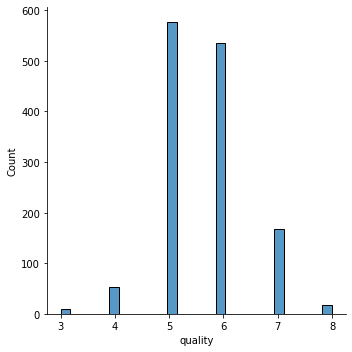

In [10]:
"""
As expected most of the data is located around 5 and 6 value.
Only few wines are very bad and few excellent.
"""

sns.displot(data, x="quality")

### let's try to predict only excellent wines and change labels to 0 or 1

In [11]:
data.loc[data["quality"] < 7, "quality"] = 0
data.loc[data["quality"] >= 7, "quality"] = 1

### checks distribution when set to binary 

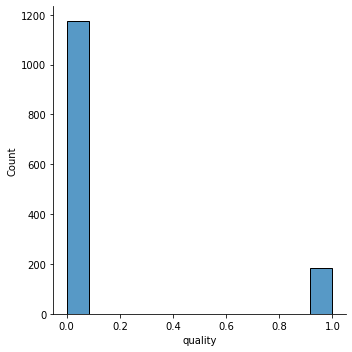

In [12]:
"""
There are much more points with quality below 7 which may lead to worse accuracy in data with
quality >= 7 but let's see how it works out
"""

sns.displot(data, x="quality")

### investigate the correlations in the data

<AxesSubplot:>

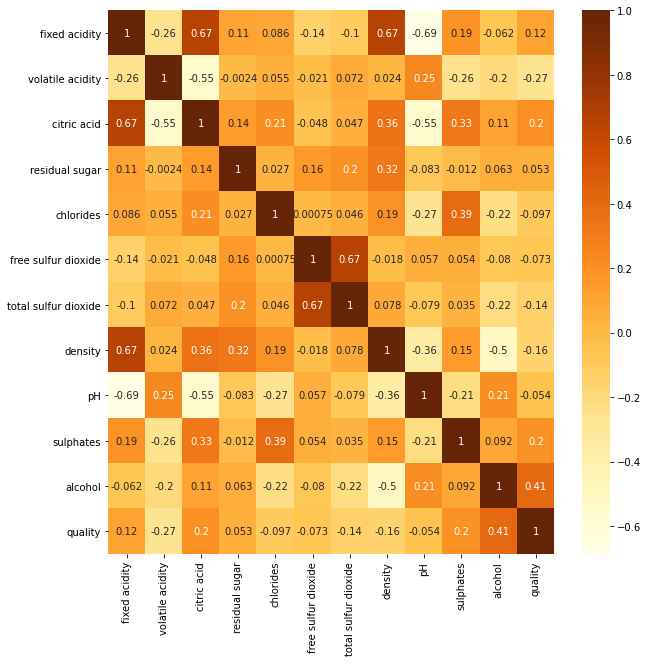

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, ax=ax, cmap="YlOrBr")

## modify dataset and features

### select features that have strongest correlation with quality label 

In [14]:
new_dataframe = data[["quality", "alcohol", "sulphates", "citric acid", "volatile acidity", "total sulfur dioxide", "chlorides", "fixed acidity"]].copy()

In [15]:
new_dataframe.head()

,quality,alcohol,sulphates,citric acid,volatile acidity,total sulfur dioxide,chlorides,fixed acidity
0,0,9.4,0.56,0.00,0.70,34.0,0.076,7.4
1,0,9.8,0.68,0.00,0.88,67.0,0.098,7.8
2,0,9.8,0.65,0.04,0.76,54.0,0.092,7.8
3,0,9.8,0.58,0.56,0.28,60.0,0.075,11.2
5,0,9.4,0.56,0.00,0.66,40.0,0.075,7.4


### checks number of each value in new quality feature

In [16]:
print("Number of 0 quality values: ", len(new_dataframe[new_dataframe["quality"] == 0]))
print("Number of 1 quality values: ", len(new_dataframe[new_dataframe["quality"] == 1]))

Number of 0 quality values:  1175
Number of 1 quality values:  184


## save processed data to csv

In [17]:
new_dataframe.to_csv("processed_data.csv", index=False)